Test notebook

In [ ]:
!pip install missingno

In [1]:
import missingno as msno

In [2]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", "T1xwTDKrHOiObAuWY2QsXpMDE")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("hn4x-zwk7", limit=100000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)


In [3]:
results_csv_df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
results_csv_df.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


<Axes: >

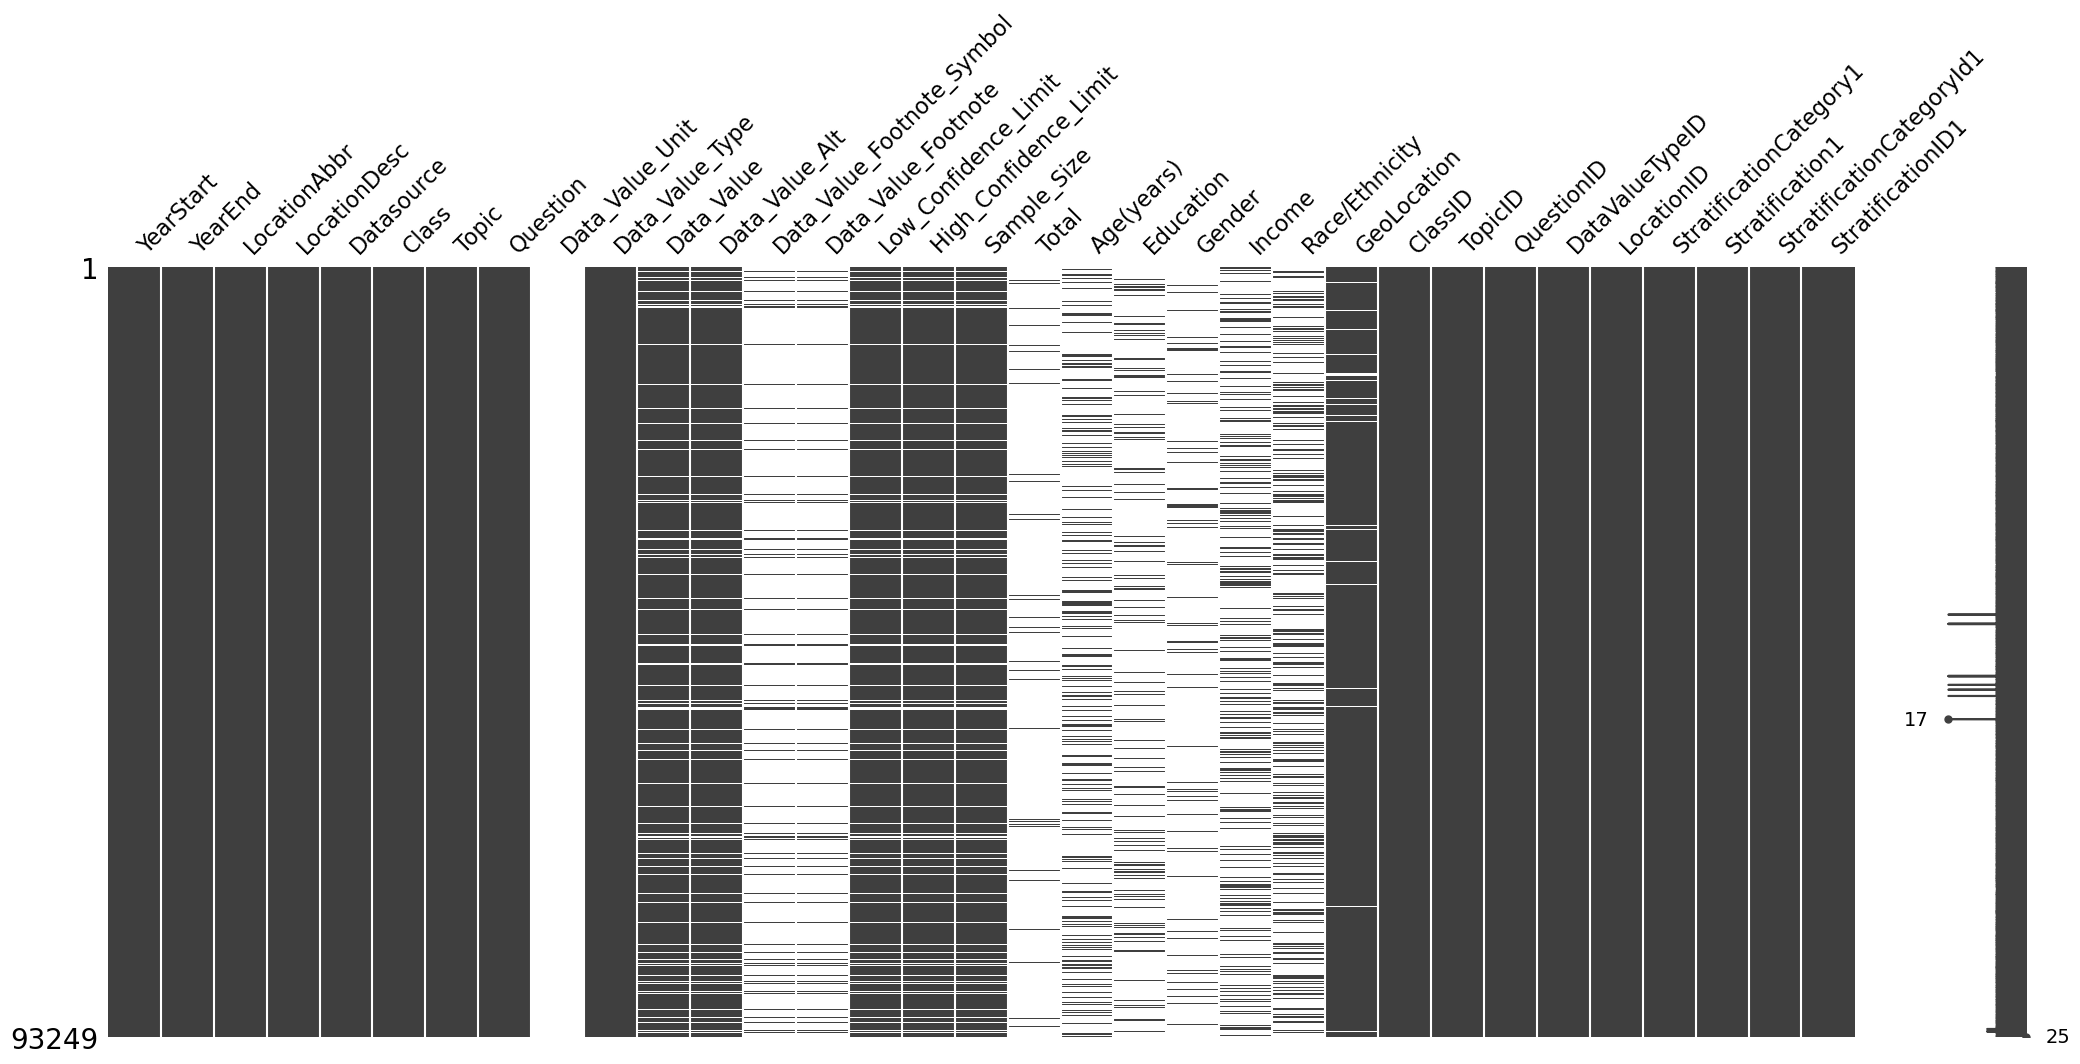

In [4]:
%matplotlib inline
msno.matrix(results_csv_df)

In [ ]:
results_csv_cleaned = results_csv_df[
    (results_csv_df['Gender'] != 0) & 
    (results_csv_df['Income'] != 0) & 
    (results_csv_df['Race/Ethnicity'] != 0)
    & (results_csv_df['Gender'].notnull()) 
    & (results_csv_df['Income'].notnull())
    & (results_csv_df['Race/Ethnicity'].notnull())
]
len(results_csv_cleaned)

In [8]:
results_csv_cleaned = results_csv_df[
#     (results_csv_df['Gender'] != 0) &
    (results_csv_df['Income'] != 0) 
#     & (results_csv_df['Gender'].notnull()) 
    & (results_csv_df['Income'].notnull())
]
len(results_csv_cleaned)

23310

In [ ]:
results_df['income']
%matplotlib inline
msno.matrix(results_df)